## <center> Particle Swarm Optimazation

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation


In [2]:
def f(x, y):
    return -np.sin(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-20, 20, 80)
y = np.linspace(-20, 20, 80)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


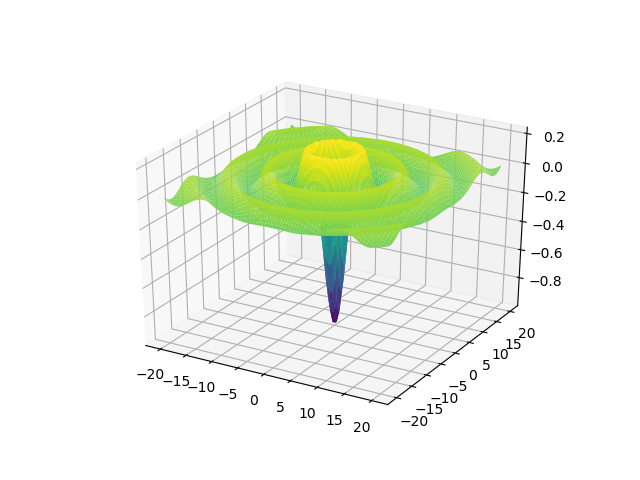

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

## Hand encoded implementation

#### Problem definition

In [4]:
# problem definition
def costFunction(pos):
    x = pos[0]
    y = pos[1]
    return -np.sin(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2)

VarSize = 2  #dimension of variable [x,y]
VarMin = -20 
VarMax =  20

#### Parameters of PSO

In [5]:
#Parameters of PSO
maxItr = 100  # Max number of Iterations
nPop  = 10   # Population size

w  = 0.5 #Inertia coefficient
c1 = 1 #Personal acceleration coefficient
c2 = 1 #Social Acceleration coefficient

Gcosts = maxItr*[0] #keeping track of all global bests

#### Initialization

In [6]:

#initialization
class Particle():
    def __init__(self, newPos, newCost, newVel):
        self.pos = newPos
        self.cost = newCost
        self.Ppos = newPos
        self.Pcost = newCost
        self.vel = newVel
        
    def updateParticle(self,newPos, newCost, newVel):
        if(newCost<self.Pcost):
            self.Ppos = newPos
            self.Pcost = newCost
        self.pos = newPos
        self.cost = newCost
        self.vel = newVel
        

Gpos = [0,0]
Gcost= 0
particles = []
for i in range(nPop):
    
    #Generate random initial positions
    newPos = np.random.uniform(VarMin,VarMax,VarSize)
    
    #Evaluate current positions
    newCost = costFunction(newPos)
    
    #Initialize velocity to zero
    newVel = np.zeros(VarSize)
    
    newParticle = Particle(newPos,newCost,newVel)

    #Finding Global best posisition & cost
    if(i==0):
        Gpos = newParticle.pos
        Gcost= newParticle.cost
    else:
        if(newParticle.cost < Gcost):
            Gpos = newParticle.pos
            Gcost= newParticle.cost
            
    particles.append(newParticle)
            

### Main Loop

In [7]:
def calculateVelocity(ptcl, w, c1, c2, Gpos, VarSize):
    r1 = np.random.rand(VarSize)
    r2 = np.random.rand(VarSize)
    C = np.array(ptcl.Ppos)-np.array(ptcl.pos)
    S = np.array(Gpos)-np.array(ptcl.pos)
    return (np.array(ptcl.vel)*w + c1*r1*C + c2*r2*S)

np.seterr('raise')

G_points = []
G_costs = []
for i in range(maxItr):
    for j in range(nPop):
        oldPos = particles[j].pos
        newVel = calculateVelocity(particles[j],w,c1,c2,Gpos,VarSize)
        newPos = particles[j].pos + newVel
        newCost = costFunction(newPos)
        
        if(newCost < Gcost):
            Gpos = newPos
            Gcost= newCost
            
        if(newCost<particles[j].Pcost):
            particles[j].Ppos = newPos
            particles[j].Pcost = newCost
        particles[j].pos = newPos
        particles[j].cost = newCost
        particles[j].vel = newVel
        
    G_points.append(Gpos)
    G_costs.append(Gcost)


-0.11510759824703126
-0.1187989198452494
-0.12798058055645065
-0.12806502274579717
-0.1479432260049362
-0.242972548908295
-0.6063287522111411
-0.9937984774253796
-0.9992613286300519
-0.9997757231395334
-0.9998838305009567
-0.9999108011703477
-0.9999267309838415
-0.9999994332177343
-0.9999997078332856
-0.9999999259439815
-0.9999999700982078
-0.9999999807164707
-0.9999999931235504
-0.9999999938140599
-0.9999999967252062
-0.9999999986067208
-0.9999999989493729
-0.9999999989821162
-0.9999999990763615
-0.9999999990963627
-0.9999999993994902
-0.9999999994033352
-0.999999999493991
-0.9999999999517162
-0.999999999984037
-0.9999999999908253
-0.9999999999916671
-0.9999999999973173
-0.9999999999999034
-0.9999999999999947
-0.9999999999999966
-0.9999999999999968
-0.9999999999999982
-0.999999999999999
-0.9999999999999993
-0.9999999999999994
-0.9999999999999998
-1.0


<IPython.core.display.Javascript object>


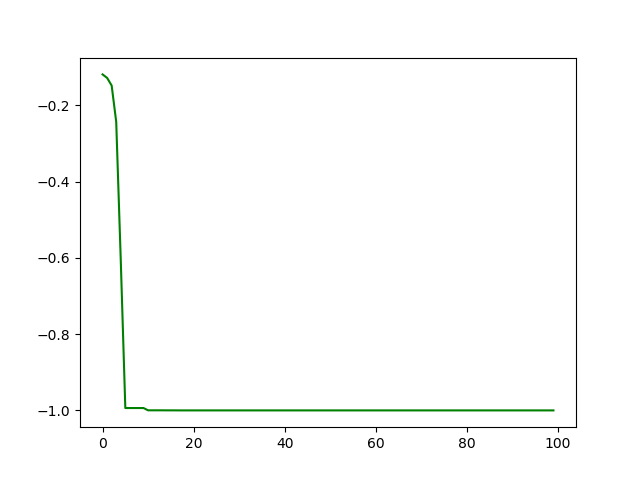

In [11]:
plt.plot(G_costs,color='green')

<IPython.core.display.Javascript object>


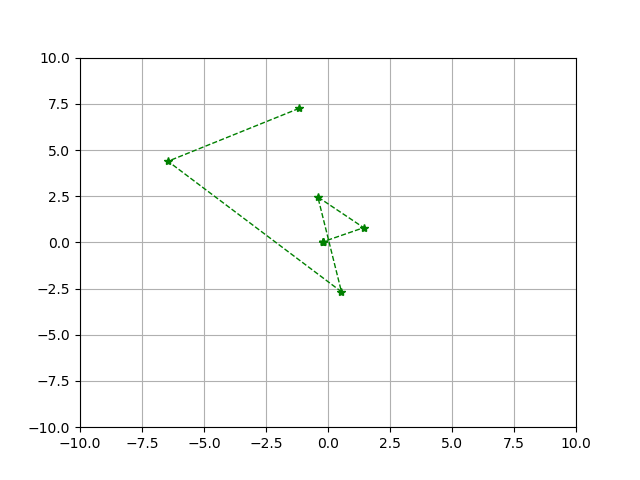

In [50]:
fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax, = plt.plot([], [],'g*',color='g',linestyle='dashed',linewidth=1 )
plt.grid()
def animate(i):
    ax.set_data(G_points[:i,0], G_points[:i,1])
    return graph

ani = FuncAnimation(fig, animate, frames=20, interval=200)


<IPython.core.display.Javascript object>


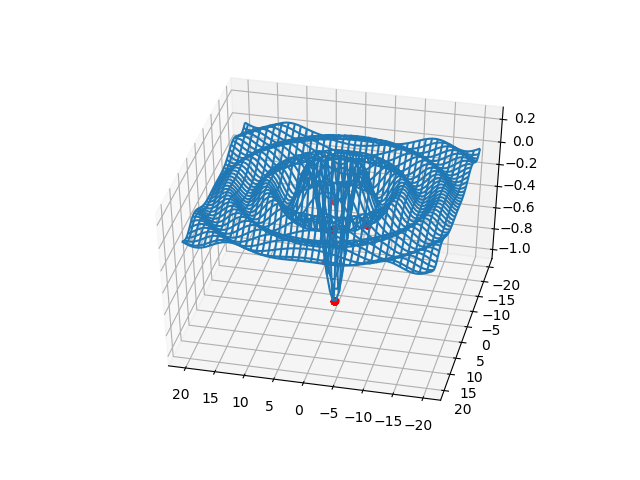

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.scatter(G_points[:,0], G_points[:,1], G_costs, color='red', marker='o');